![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_IMDB.ipynb)


# Training a Sentiment Analysis Classifier with NLU
## 2 class IMDB Movie sentiment classifier training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem

This notebook showcases the following features :

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:


<br>


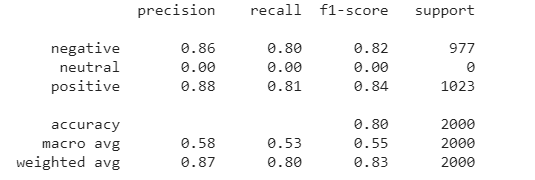



You  can achieve these results or even better on this dataset with test  data:


<br>


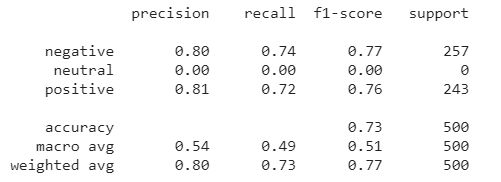


# 1. Install Java 8 and NLU

In [ ]:
!pip install -q johnsnowlabs

# 2. Download IMDB dataset
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

In [ ]:
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/IMDB/IMDB-Dataset.csv


In [2]:
import pandas as pd
from johnsnowlabs import nlp
train_path = '/content/IMDB-Dataset.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
# the label column must have name 'y' name be of type str
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
11147,I have not seen and heard the original version...,negative
5176,Ghost Story has an interesting feminist reveng...,negative
23853,Christ. A sequel to one of the most cloying fi...,negative
12990,Mendez and Marichal have provided us with a se...,positive
28039,"""Bend It Like Beckham"" is a film that got very...",positive
...,...,...
30425,This movie is a lot better than the asylums ve...,positive
6508,I concur with everyone above who said anything...,negative
2432,"The ""Wrinkle in Time"" book series is my favori...",negative
12347,Clint Eastwood scores big in this thriller fro...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
from johnsnowlabs import nlp
from sklearn.metrics import classification_report

# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlp.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        23
    positive       0.54      1.00      0.70        27

    accuracy                           0.54        50
   macro avg       0.27      0.50      0.35        50
weighted avg       0.29      0.54      0.38        50



,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,This film has to be viewed in the right frame ...,"[-0.1513771265745163, 0.3099152743816376, -0.2...",positive,0.0,This film has to be viewed in the right frame ...,positive
1,This is just a long advertisement for the movi...,"[-0.3328755795955658, 0.2796784043312073, 0.10...",positive,0.0,This is just a long advertisement for the movi...,negative
2,This movie was physically painful to sit throu...,"[-0.6589022278785706, 0.09297071397304535, 0.0...",positive,0.0,This movie was physically painful to sit throu...,negative
3,This movie was one of a handful that actually ...,"[-0.5372501015663147, 0.5361205339431763, -0.0...",positive,0.0,This movie was one of a handful that actually ...,negative
4,I was pleasantly pleased with the ending. I ju...,"[-0.3981836140155792, 0.3446210026741028, -0.0...",positive,0.0,I was pleasantly pleased with the ending. I ju...,negative
5,"I would purchase this and ""Thirty Seconds Over...","[-0.4655883014202118, 0.7156240940093994, -0.1...",positive,0.0,"I would purchase this and ""Thirty Seconds Over...",positive
6,"In any number of films, you can find Nicholas ...","[-0.366023987531662, 0.2559768557548523, -0.03...",positive,0.0,"In any number of films, you can find Nicholas ...",positive
7,This film is quite boring. There are snippets ...,"[-0.4195595383644104, 0.37842151522636414, -0....",positive,0.0,This film is quite boring. There are snippets ...,negative
8,Let's start this review out on a positive note...,"[-0.5557488203048706, -0.04156230762600899, 0....",positive,0.0,Let's start this review out on a positive note...,positive
9,Payback is the game being played in this drama...,"[-0.48163551092147827, 0.21267670392990112, -0...",positive,0.0,Payback is the game being played in this drama...,negative


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict('It was one of the best films i have ever watched in my entire life !')

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence
0,It was one of the best films i have ever watch...,"[-0.6158236265182495, -0.5645654201507568, -0....",positive,0.997638


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['bert_sentence_embeddings@sent_small_bert_L2_128'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setBatchSize(8)              | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setEngine('tensorflow')      | Info: Deep Learning engine used for this model | Currently set to : tensorflow
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setIsLong(False)             | Info: Use Long type instead of Int type for inputs buffer - Some Bert models require Long instead of Int. | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setMaxSentenceLength(128)    | Info: Max sentence length to process | Currently set to : 128
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setDimension(128)            | I

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe = nlp.load('train.sentiment')
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(5)
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.56      1.00      0.72        28
    positive       0.00      0.00      0.00        22

    accuracy                           0.56        50
   macro avg       0.28      0.50      0.36        50
weighted avg       0.31      0.56      0.40        50



,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,"Set in 1945, Skenbart follows a failed Swedish...","[-0.37176743149757385, 0.28505513072013855, -0...",negative,3.0,"Set in 1945, Skenbart follows a failed Swedish...",negative
1,I can't believe I watched this whole movie. An...,"[-0.6678956151008606, 0.4565986394882202, -0.3...",negative,2.0,I can't believe I watched this whole movie. An...,negative
2,I'm beginning to see a pattern in the movies I...,"[-0.4640607237815857, 0.13232995569705963, -0....",negative,3.0,I'm beginning to see a pattern in the movies I...,negative
3,"Dan, the widowed father of three girls, has hi...","[-1.204692006111145, 0.2007242888212204, -0.27...",negative,1.0,"Dan, the widowed father of three girls, has hi...",positive
4,David Webb Peoples meets Paul Anderson...if it...,"[-0.23281101882457733, 0.1650732308626175, 0.1...",negative,2.0,David Webb Peoples meets Paul Anderson...if it...,positive
5,I love MIDNIGHT COWBOY and have it in my video...,"[-0.731963574886322, 0.055591657757759094, -0....",negative,3.0,I love MIDNIGHT COWBOY and have it in my video...,positive
6,I have NEVER EVER seen such a bad movie before...,"[-0.8489042520523071, -0.11029214411973953, -0...",negative,2.0,I have NEVER EVER seen such a bad movie before...,negative
7,I absolutely could not believe the levels of i...,"[-0.7605423331260681, 0.3872695565223694, -0.2...",negative,2.0,I absolutely could not believe the levels of i...,negative
8,"A brash, self-centered Army cadet arrives at W...","[-0.6972024440765381, 0.3831547200679779, -0.2...",negative,3.0,"A brash, self-centered Army cadet arrives at W...",positive
9,The film is a remake of a 1956 BBC serial call...,"[-0.19118931889533997, 0.3001491129398346, 0.0...",negative,4.0,The film is a remake of a 1956 BBC serial call...,positive


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlp.nlu.print_components(action='embed_sentence')

For language <am> NLU provides the following Models : 
nlu.load('am.embed_sentence.xlm_roberta') returns Spark NLP model_anno_obj sent_xlm_roberta_base_finetuned_amharic
For language <de> NLU provides the following Models : 
nlu.load('de.embed_sentence.bert.base_cased') returns Spark NLP model_anno_obj sent_bert_base_cased
For language <el> NLU provides the following Models : 
nlu.load('el.embed_sentence.bert.base_uncased') returns Spark NLP model_anno_obj sent_bert_base_uncased
For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model_anno_obj tfhub_use
nlu.load('en.embed_sentence.albert') returns Spark NLP model_anno_obj albert_base_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model_anno_obj sent_bert_base_uncased
nlu.load('en.embed_sentence.bert.base_uncased_legal') returns Spark NLP model_anno_obj sent_bert_base_uncased_legal
nlu.load('en.embed_sentence.bert.finetuned') returns Spark NLP model_anno_obj sbert_setfit_

In [ ]:
trainable_pipe = nlp.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(120)
trainable_pipe['trainable_sentiment_dl'].setLr(0.0005)
fitted_pipe = trainable_pipe.fit(train_df[:100])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df[:100],output_level='document')

#sentence detector that is part of the pipe generates some NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

              precision    recall  f1-score   support

    negative       1.00      0.55      0.71        44
     neutral       0.00      0.00      0.00         0
    positive       0.98      0.88      0.92        56

    accuracy                           0.73       100
   macro avg       0.66      0.47      0.54       100
weighted avg       0.99      0.73      0.83       100



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.94      0.34      0.50        50
     neutral       0.00      0.00      0.00         0
    positive       0.76      0.64      0.70        50

    accuracy                           0.49       100
   macro avg       0.57      0.33      0.40       100
weighted avg       0.85      0.49      0.60       100



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained'
fitted_pipe.save(stored_model_path)

# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlp.load(path=stored_model_path)

preds = hdd_pipe.predict('It was one of the best films i have ever watched in my entire life !!')
preds

,document,sentence_embedding_from_disk,sentiment,sentiment_confidence
0,It was one of the best films i have ever watch...,"[0.09222032874822617, 0.1172066256403923, 0.19...",positive,0.0


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['document_assembler'] has settable params:
component_list['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> component_list['bert_sentence_embeddings@sent_small_bert_L12_768'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setBatchSize(8)               | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setCaseSensitive(False)       | Info: whether to ignore case in tokens for embeddings matching | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setDimension(768)             | Info: Number of embedding dimensions | Currently set to : 768
component_list[